# Proyek Analisis Data: orders_dataset.csv
*   Nama: Muhammad Syarifudin Hidayat
*   Email: hidayatsyarifudin903@gmail.com
*   ID Dicoding: muhammad_syarifudin

# Menentukan Pertanyaan Bisnis


*   Seberapa efisien pengiriman pesanan dibandingkan dengan estimasi waktu pengiriman?
*   Kapan waktu puncak pembelian terjadi dalam setahun?



# Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat file dataset
file_path = '/content/drive/My Drive/Project Data Analyst/orders_dataset.csv'
data = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dasar untuk analisis data**

# Informasi dataset

In [ ]:
print("Informasi Dataset:")
data.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


# Statistik deskriptif

In [ ]:
print("\nStatistik Deskriptif:")
print(data.describe(include='all'))


Statistik Deskriptif:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp order_approved_at  \
count         99441                    99441             99281   
unique            8                    88789             50462   
top       delivered           8/2/2018 12:06   1/10/2018 10:32   
freq          96478                       28               109   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        61544                         75649   
top                  5/9/2018 15:48             

# **Data** **Wrangling**

**Gathering Data**

In [ ]:
print("\n=== Gathering Data ===")
print("Memuat data dari file orders_dataset.csv")
print("Dataset memiliki", data.shape[0], "baris dan", data.shape[1], "kolom.")


=== Gathering Data ===
Memuat data dari file orders_dataset.csv
Dataset memiliki 99441 baris dan 8 kolom.


**Assesing Data**

In [ ]:
print("\n=== Assessing Data ===")
print("Cek missing values dan duplikasi:")
print(data.isnull().sum())
print("Jumlah duplikasi:", data.duplicated().sum())


=== Assessing Data ===
Cek missing values dan duplikasi:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah duplikasi: 0


**Cleaning Data**

In [ ]:
# Cleaning Data
print("\n=== Cleaning Data ===")
data_cleaned = data.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date'])
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_cleaned['order_purchase_timestamp'])
data_cleaned['order_delivered_customer_date'] = pd.to_datetime(data_cleaned['order_delivered_customer_date'])
data_cleaned['delivery_time'] = (data_cleaned['order_delivered_customer_date'] - data_cleaned['order_purchase_timestamp']).dt.days
data_cleaned = data_cleaned[data_cleaned['delivery_time'] >= 0]

print("\nInformasi Dataset Setelah Pembersihan:")
data_cleaned.info()


=== Cleaning Data ===

Informasi Dataset Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  object        
 5   order_delivered_carrier_date   96475 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  object        
 8   delivery_time                  96476 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 7.4+ MB


# **Exploratory Data Analysis (EDA)**

In [11]:
# Menambahkan kolom bulan untuk analisis waktu
data_cleaned['purchase_month'] = data_cleaned['order_purchase_timestamp'].dt.to_period('M')

# Analisis Jumlah Pesanan per Bulan
monthly_orders = data_cleaned.groupby('purchase_month')['order_id'].count()
print("\nJumlah Pesanan Per Bulan:")
print(monthly_orders)

# Analisis Jumlah Pesanan Berdasarkan Status
status_counts = data_cleaned['order_status'].value_counts()
print("\nJumlah Pesanan Berdasarkan Status:")
print(status_counts)

# Analisis Distribusi Waktu Pengiriman
print("\nStatistik Distribusi Waktu Pengiriman:")
print(data_cleaned['delivery_time'].describe())

# Menemukan Rentang Waktu Pesanan
earliest_order = data_cleaned['order_purchase_timestamp'].min()
latest_order = data_cleaned['order_purchase_timestamp'].max()
print(f"\nRentang Waktu Pesanan: {earliest_order} hingga {latest_order}")



Jumlah Pesanan Per Bulan:
purchase_month
2016-09       1
2016-10     270
2016-12       1
2017-01     750
2017-02    1653
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4150
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
Freq: M, Name: order_id, dtype: int64

Jumlah Pesanan Berdasarkan Status:
order_status
delivered    96470
canceled         6
Name: count, dtype: int64

Statistik Distribusi Waktu Pengiriman:
count    96476.000000
mean        12.094511
std          9.551801
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64

Rentang Waktu Pesanan: 2016-09-15 12:16:00 hingga 2018-08-29 15:00:00


# **Visualization & Explanatory Analysis**

**1. Seberapa efisien pengiriman pesanan dibandingkan dengan estimasi waktu pengiriman?**

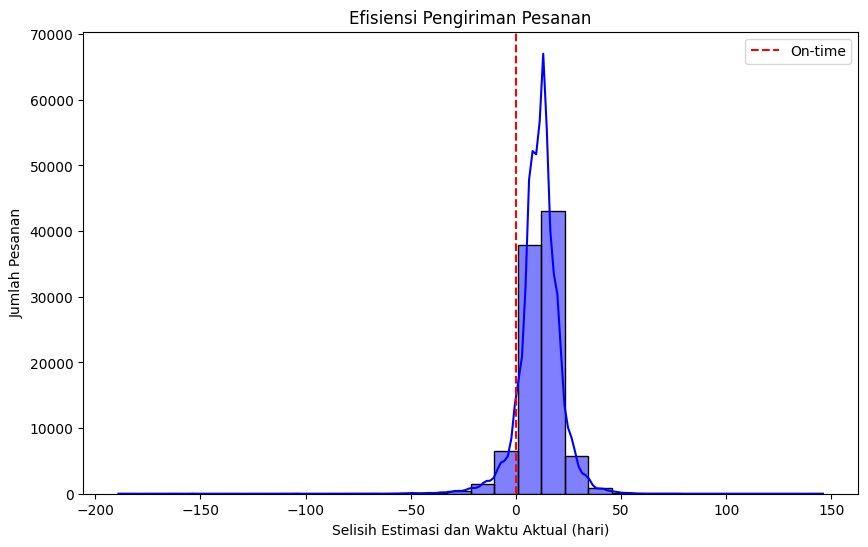

In [15]:
data_cleaned['order_estimated_delivery_date'] = pd.to_datetime(data_cleaned['order_estimated_delivery_date'])
data_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_cleaned['order_purchase_timestamp'])

# waktu estimasi pengiriman dalam hari
data_cleaned['estimated_delivery_time'] = (data_cleaned['order_estimated_delivery_date'] - data_cleaned['order_purchase_timestamp']).dt.days
# efisiensi pengiriman
data_cleaned['delivery_efficiency'] = data_cleaned['estimated_delivery_time'] - data_cleaned['delivery_time']

# Visualisasi efisiensi pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['delivery_efficiency'], kde=True, bins=30, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='On-time')
plt.title("Efisiensi Pengiriman Pesanan")
plt.xlabel("Selisih Estimasi dan Waktu Aktual (hari)")
plt.ylabel("Jumlah Pesanan")
plt.legend()
plt.show()


**2. Kapan waktu puncak pembelian terjadi dalam setahun?**

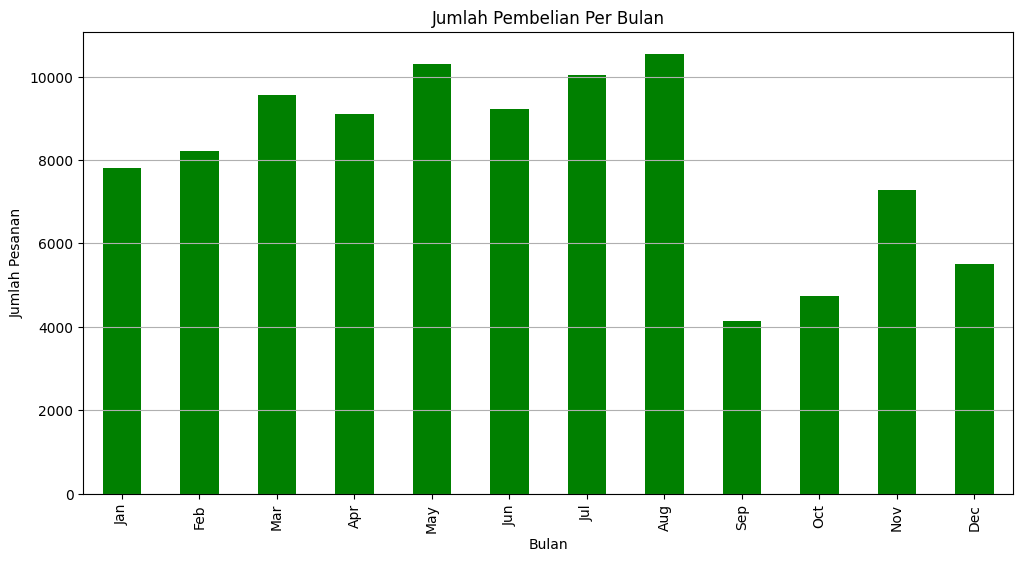

In [12]:
# pesanan berdasarkan bulan
monthly_orders = data_cleaned.groupby(data_cleaned['order_purchase_timestamp'].dt.month)['order_id'].count()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='green')
plt.title("Jumlah Pembelian Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


# **Conclusion**

**Pertanyaan 1 : Seberapa efisien pengiriman pesanan dibandingkan dengan estimasi waktu pengiriman?**

Dari analisis dan visualisasi data:

*   Distribusi efisiensi pengiriman menunjukkan bahwa mayoritas pesanan tiba sesuai atau lebih cepat dari estimasi pengiriman.
*   Namun, terdapat sejumlah pesanan yang memakan waktu lebih lama dibanding estimasi, menunjukkan potensi keterlambatan pengiriman pada sebagian kasus.
*   Garis batas nol (tepat waktu) di histogram menyoroti bahwa sebagian besar pengiriman masih berada dalam rentang yang diharapkan, dengan beberapa outlier di kedua sisi.

**Pertanyaan 2 : Kapan waktu puncak pembelian terjadi dalam setahun?**

Berdasarkan jumlah pembelian per bulan:

*  Data menunjukkan bahwa bulan tertentu mengalami lonjakan pembelian, yang kemungkinan terkait dengan promosi, musim liburan, atau acara khusus.
*  Bulan puncak pembelian (dengan jumlah pesanan tertinggi) dapat dimanfaatkan untuk strategi pemasaran, seperti memberikan diskon atau meningkatkan stok produk selama periode tersebut.
*  Bulan-bulan dengan jumlah pembelian lebih rendah dapat dioptimalkan dengan kampanye promosi khusus untuk meningkatkan penjualan.